In [44]:
# Melakukan import modul drive dari google.colab
from google.colab import drive

# Mount Google Drive ke direktori /content/drive
drive.mount('/content/drive')

# Import library pandas dengan alias 'pd'
import pandas as pd


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
# Mendefinisikan path/file lokasi dataset CSV
file_path = '/content/Mall_Customers.csv'

# Menggunakan pandas untuk membaca dataset CSV ke dalam dataframe
df = pd.read_csv(file_path)

# Menampilkan lima baris pertama dari dataframe
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [46]:
# Mengganti nama kolom 'Annual Income (k$)' dan 'Spending Score (1-100)' menjadi 'Annual income' dan 'Spending score'
df = df.rename(columns={'Annual Income (k$)': 'Annual income', 'Spending Score (1-100)': 'Spending score'})

# Menampilkan lima baris pertama dari dataframe setelah mengganti nama kolom
df.head()


,CustomerID,Gender,Age,Annual income,Spending score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [47]:
# Menghapus kolom 'CustomerID' dan 'Gender' dari dataframe
df = df.drop(['CustomerID', 'Gender'], axis=1)

# Menampilkan lima baris pertama dari dataframe setelah menghapus kolom
print(df.head())


   Age  Annual income  Spending score
0   19             15              39
1   21             15              81
2   20             16               6
3   23             16              77
4   31             17              40


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

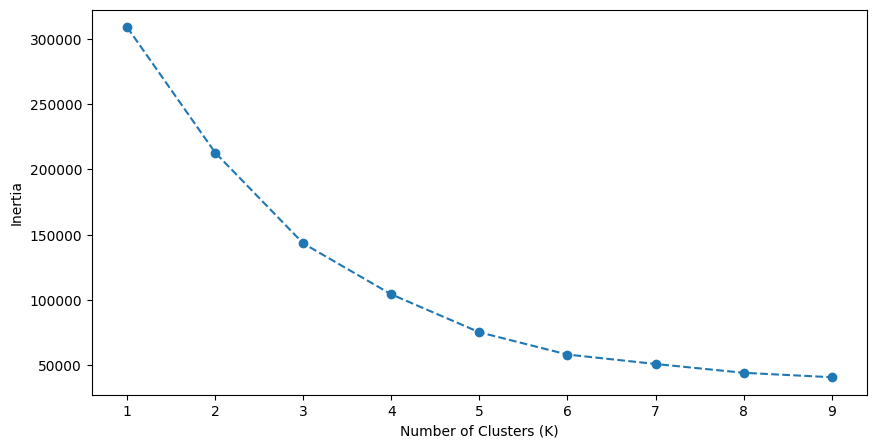

In [48]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Memilih kolom 'Age', 'Annual income', dan 'Spending score' sebagai fitur untuk clustering
X = df[['Age', 'Annual income', 'Spending score']]

# Menentukan jumlah maksimum cluster yang akan diuji
max_k = 10

# Inisialisasi list untuk menyimpan nilai inertia
inertia_values = []

# Melakukan perulangan untuk menguji jumlah cluster dari 1 hingga max_k-1
for k in range(1, max_k):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Membuat plot dengan jumlah cluster (K) pada sumbu x dan inertia pada sumbu y
plt.figure(figsize=(10, 5))
plt.plot(range(1, max_k), inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


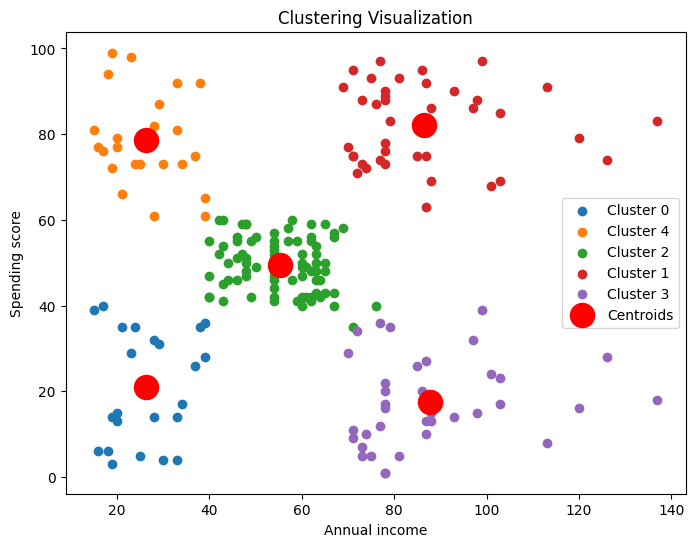

In [49]:
n_clusters = 5  # Jumlah cluster yang ingin Anda bentuk
kmeans = KMeans(n_clusters, random_state=0)

# Menyimpan hasil prediksi cluster pada dataframe 'df' dengan kolom baru 'label'
df['label'] = kmeans.fit_predict(X)

# Membuat plot untuk visualisasi hasil clustering
plt.figure(figsize=(8, 6))
for label in df['label'].unique():
    plt.scatter(df[df['label'] == label]['Annual income'], df[df['label'] == label]['Spending score'], label=f'Cluster {label}')

# Menampilkan titik-titik centroid cluster
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='red', label='Centroids')

# Memberi label sumbu x dan y serta judul plot
plt.xlabel('Annual income')
plt.ylabel('Spending score')
plt.title('Clustering Visualization')

# Menampilkan legenda untuk cluster dan centroid
plt.legend()
plt.show()


In [50]:
from sklearn.metrics import silhouette_score

# Membuat dictionary untuk menyimpan nilai Silhouette Score
silhouette_scores = {}

# Melakukan perulangan untuk menguji berbagai jumlah cluster dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores[k] = silhouette_avg

# Mencetak hasil Silhouette Score untuk setiap jumlah cluster yang diuji
for k, silhouette_avg in silhouette_scores.items():
    print(f"Silhouette Score for k={k}: {silhouette_avg}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette Score for k=2: 0.293166070535953
Silhouette Score for k=3: 0.3839349967742105
Silhouette Score for k=4: 0.40546302077733304
Silhouette Score for k=5: 0.44428597560893024
Silhouette Score for k=6: 0.4523443947724053
Silhouette Score for k=7: 0.4412807576186172
Silhouette Score for k=8: 0.4280971079746162
Silhouette Score for k=9: 0.40126260157691634
Silhouette Score for k=10: 0.3790978814868016


In [51]:
from sklearn.metrics import davies_bouldin_score

# Membuat dictionary untuk menyimpan nilai Davies-Bouldin Index
dbi_scores = {}

# Melakukan perulangan untuk menguji berbagai jumlah cluster dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)
    dbi = davies_bouldin_score(X, labels)
    dbi_scores[k] = dbi

# Mencetak hasil Davies-Bouldin Index untuk setiap jumlah cluster yang diuji
for k, dbi in dbi_scores.items():
    print(f"Davies-Bouldin Index for k={k}: {dbi}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Davies-Bouldin Index for k=2: 1.3571023143309133
Davies-Bouldin Index for k=3: 0.8748062648492879
Davies-Bouldin Index for k=4: 0.8914904209843165
Davies-Bouldin Index for k=5: 0.8218781633199781
Davies-Bouldin Index for k=6: 0.746974007275528
Davies-Bouldin Index for k=7: 0.7863764854525301
Davies-Bouldin Index for k=8: 0.8641438876447516
Davies-Bouldin Index for k=9: 0.9070119449899816
Davies-Bouldin Index for k=10: 0.9573604236246045


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [52]:
from sklearn.metrics import calinski_harabasz_score

# Membuat dictionary untuk menyimpan nilai Calinski-Harabasz Index
chi_scores = {}

# Melakukan perulangan untuk menguji berbagai jumlah cluster dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)
    chi = calinski_harabasz_score(X, labels)
    chi_scores[k] = chi

# Mencetak hasil Calinski-Harabasz Index untuk setiap jumlah cluster yang diuji
for k, chi in chi_scores.items():
    print(f"Calinski-Harabasz Index for k={k}: {chi}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Calinski-Harabasz Index for k=2: 89.28096999467428
Calinski-Harabasz Index for k=3: 113.70507138642179
Calinski-Harabasz Index for k=4: 127.9838294818919
Calinski-Harabasz Index for k=5: 151.04386000160667
Calinski-Harabasz Index for k=6: 166.7204931788687
Calinski-Harabasz Index for k=7: 162.2852042279988
Calinski-Harabasz Index for k=8: 163.58062876554533
Calinski-Harabasz Index for k=9: 156.15508760692356
Calinski-Harabasz Index for k=10: 152.26426170758603
